In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
dataframe = pd.read_csv('../Dataset/penjualan_beras.csv', sep=';');
dataframe.head()

,X (Harga per Kilogram),Total Harga
0,10000,50000
1,12000,36000
2,15000,30000
3,11000,44000
4,13000,26000


In [20]:
x = dataframe.iloc[:, :-1].values
y = np.log1p(dataframe.iloc[:, 1].values)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x, y)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(x_test)
y_pred = np.expm1(y_pred)
y_pred

array([142466.06921218, 137399.98920278, 153165.48711496, 143761.51041912,
       143761.51041912, 158812.85314183, 140926.939109  , 146123.06047048,
       132514.0572571 , 132514.0572571 , 153165.48711496, 147718.93948277,
       137399.98920278, 146387.8379589 , 142466.06921218, 139910.10119849,
       134934.91053307, 139910.10119849, 130136.63593753, 158812.85314183,
       158812.85314183, 137399.98920278, 154558.21723869, 139910.10119849,
       149062.14460204, 137399.98920278, 146387.8379589 ])

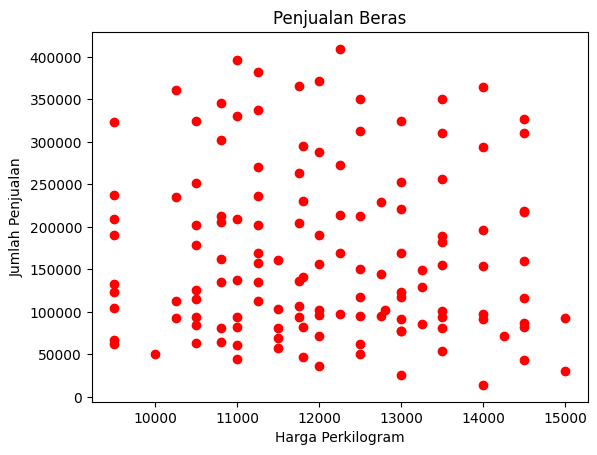

In [25]:
plt.scatter(dataframe['X (Harga per Kilogram)'], dataframe['Total Harga'], color = 'red')
plt.xlabel('Harga Perkilogram')
plt.ylabel('Jumlah Penjualan')
plt.title('Penjualan Beras')
plt.show()

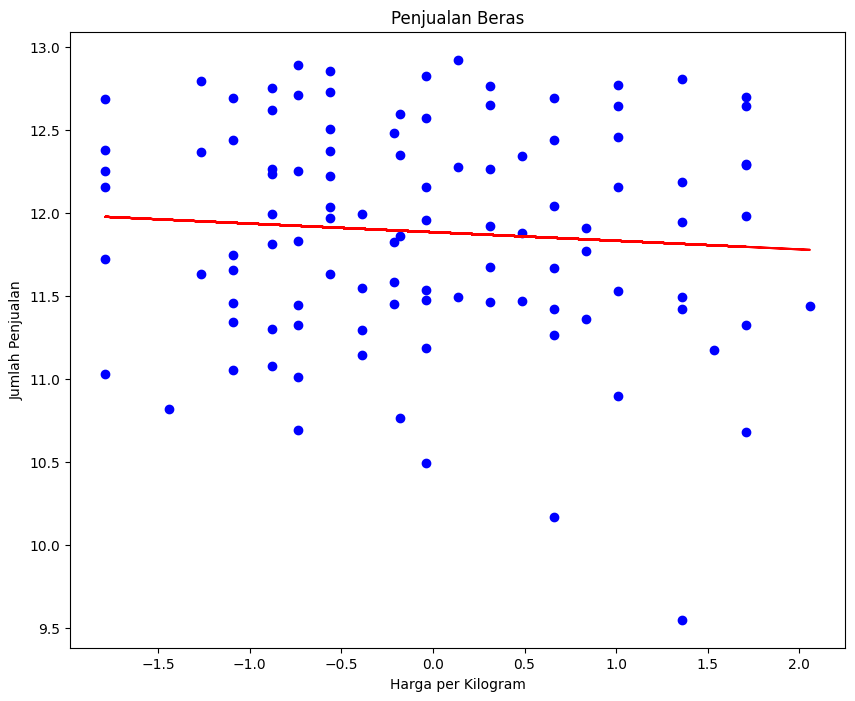

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(x_train, y_train, color='blue')

plt.plot(x_train, regressor.predict(x_train), color='red')
plt.xlabel('Harga per Kilogram')
plt.ylabel('Jumlah Penjualan')
plt.title('Penjualan Beras')
plt.show()

In [27]:
dataframe.corr()

,X (Harga per Kilogram),Total Harga
X (Harga per Kilogram),1.000000,-0.056057
Total Harga,-0.056057,1.000000


In [28]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, regressor.predict(x_train)))
print('MSE:', metrics.mean_squared_error(y_train, regressor.predict(x_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(x_train))))

MAE: 0.5464824885955422
MSE: 0.437412107197333
RMSE: 0.6613713837151809


In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, regressor.predict(x_test)))
print('MSE:', metrics.mean_squared_error(y_test, regressor.predict(x_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(x_test))))

MAE: 0.5013968915478463
MSE: 0.36502933780461444
RMSE: 0.6041765783317112
